In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

In [2]:
TRAIN_TEST_SPLIT = 0.8

In [3]:
data = pd.read_csv('model_data_pi.csv')
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [4]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data = data.iloc[:138,:]

In [5]:
data

,temp_pi_t0,hum_pi_t0,PM1_pi_t0,PM2.5_pi_t0,PM10_pi_t0,wind_speed_t0,temp_pi_t1,hum_pi_t1,PM1_pi_t1,PM2.5_pi_t1,...,PM10_pi_t4,wind_speed_t4,temp_pi_t5,hum_pi_t5,PM1_pi_t5,PM2.5_pi_t5,PM10_pi_t5,wind_speed_t5,PM2.5_pi,PM10_pi
0,17.625000,30.933333,4.365000,9.652500,15.223333,9.826088,19.983333,28.125000,4.610000,10.042500,...,15.388333,6.924738,8.316667,53.283333,6.042500,11.798333,17.710000,5.116561,6.641000,9.477000
1,13.990000,35.770000,3.787000,6.641000,9.477000,8.209263,17.625000,30.933333,4.365000,9.652500,...,9.632500,7.421590,13.408333,38.358333,4.840833,10.010000,15.388333,6.924738,10.465000,16.762500
2,12.683333,37.733333,4.529167,10.465000,16.762500,8.496304,13.990000,35.770000,3.787000,6.641000,...,8.284167,6.952755,17.391667,32.191667,5.140833,7.510833,9.632500,7.421590,6.040000,9.553333
3,11.616667,40.350000,2.710000,6.040000,9.553333,7.754637,12.683333,37.733333,4.529167,10.465000,...,15.750000,11.269782,18.650000,30.083333,3.752500,6.064167,8.284167,6.952755,7.147500,10.535000
4,10.425000,42.900000,3.815000,7.147500,10.535000,6.162207,11.616667,40.350000,2.710000,6.040000,...,15.223333,9.826088,19.983333,28.125000,4.610000,10.042500,15.750000,11.269782,7.878333,12.093333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,8.933333,60.208333,3.473333,6.749167,10.107500,5.411986,9.291667,60.083333,2.995833,7.039167,...,7.769091,6.725354,11.908333,55.633333,4.087500,7.718333,11.420000,8.217153,7.871667,13.393333
134,8.225000,63.216667,2.787500,7.871667,13.393333,5.506941,8.933333,60.208333,3.473333,6.749167,...,7.878333,6.569383,11.127273,57.472727,3.157273,5.473636,7.769091,6.725354,5.710833,8.541667
135,7.658333,67.016667,2.947500,5.710833,8.541667,4.320000,8.225000,63.216667,2.787500,7.871667,...,11.719091,5.760000,10.466667,58.158333,3.364167,5.647500,7.878333,6.569383,7.948333,11.751667
136,7.400000,65.883333,4.213333,7.948333,11.751667,4.553679,7.658333,67.016667,2.947500,5.710833,...,11.340000,9.720000,9.872727,59.609091,3.670000,7.613636,11.719091,5.760000,10.420000,16.796667


In [6]:
labels = ['PM2.5_pi', 'PM10_pi']

In [7]:
X = data.drop(labels, axis=1)
y1 = data[labels[0]]
y2 = data[labels[1]]

In [8]:
parameters = {'learning_rate':[0.01, 0.1, 1], 
              'n_estimators':[100, 500, 1000], 
              'max_depth':[2, 3, 4], 
              'colsample_bytree':[0.1, 0.5, 1]}

In [9]:
xgb = XGBRegressor()

In [10]:
search1 = GridSearchCV(xgb, parameters)
search2 = GridSearchCV(xgb, parameters)

In [11]:
search1.fit(X, y1)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
      

In [12]:
search2.fit(X, y2)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
      

In [13]:
params1 = search1.best_params_
params2 = search2.best_params_

In [14]:
print("Params 1: ", params1)
print("Params 2: ", params2)

Params 1:  {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500}
Params 2:  {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}


In [15]:
n = int(TRAIN_TEST_SPLIT*data.shape[0])

X_train = data.iloc[:n,:]
X_test = data.iloc[n:,:]

y_train1 = X_train[labels[0]]
y_train2 = X_train[labels[1]]

y_true1 = X_test[labels[0]]
y_true2 = X_test[labels[1]]

X_train = X_train.drop(labels, axis=1)
X_test = X_test.drop(labels, axis=1)

In [16]:
model1 = XGBRegressor(**params1)
model1.fit(X_train.values, y_train1.values)
y_pred1 = model1.predict(X_test.values)
mse1 = mean_squared_error(y_true1, y_pred1)
mae1 = mean_absolute_error(y_true1, y_pred1)
print("MSE: {}".format(mse1))
print("MAE: {}".format(mae1))

MSE: 2.8971505260723265
MAE: 1.3563836205098538


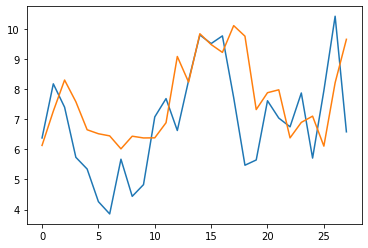

In [17]:
plt.plot(np.arange(len(y_true1)), y_true1)
plt.plot(np.arange(len(y_pred1)), y_pred1)
plt.show()

In [18]:
model2 = XGBRegressor(**params2)
model2.fit(X_train.values, y_train2.values)
y_pred2 = model2.predict(X_test.values)
mse2 = mean_squared_error(y_true2, y_pred2)
mae2 = mean_absolute_error(y_true2, y_pred2)
print("MSE: {}".format(mse2))
print("MAE: {}".format(mae2))

MSE: 7.716793513238583
MAE: 2.2474720262992607


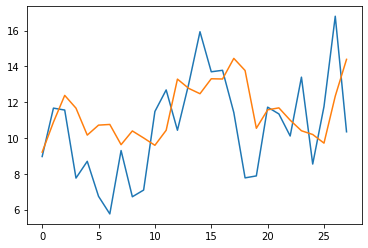

In [19]:
plt.plot(np.arange(len(y_true2)), y_true2)
plt.plot(np.arange(len(y_pred2)), y_pred2)
plt.show()

In [20]:
#Comparison with simple Ridge model
ridge = Ridge(alpha=2e-05)
ridge.fit(X_train.values, y_train1.values)
preds = ridge.predict(X_test.values)
mse = mean_squared_error(y_true1, preds)
mae = mean_absolute_error(y_true1, preds)
print("MSE: {}".format(mse))
print("MAE: {}".format(mae))

MSE: 7.381204801827371
MAE: 2.2673547997239827


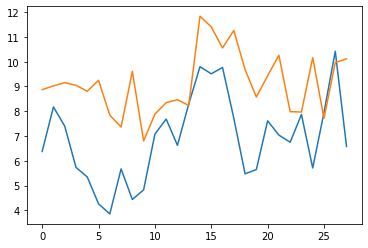

In [21]:
plt.plot(np.arange(len(y_true1)), y_true1)
plt.plot(np.arange(len(preds)), preds)
plt.show()

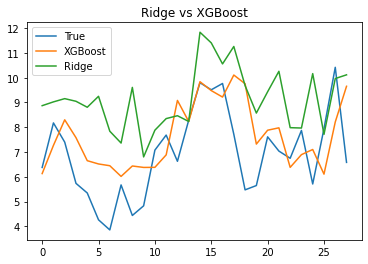

In [22]:
plt.plot(np.arange(len(y_true1)), y_true1)
plt.plot(np.arange(len(y_pred1)), y_pred1)
plt.plot(np.arange(len(preds)), preds)
plt.title("Ridge vs XGBoost")
plt.legend(['True', 'XGBoost', 'Ridge'])
plt.show()

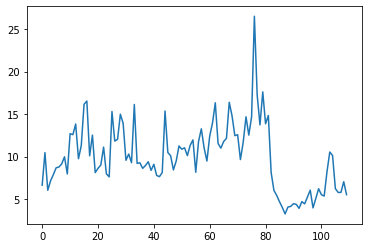

In [23]:
plt.plot(np.arange(len(y_train1)), y_train1)
plt.show()

In [24]:
X_train

,temp_pi_t0,hum_pi_t0,PM1_pi_t0,PM2.5_pi_t0,PM10_pi_t0,wind_speed_t0,temp_pi_t1,hum_pi_t1,PM1_pi_t1,PM2.5_pi_t1,...,PM1_pi_t4,PM2.5_pi_t4,PM10_pi_t4,wind_speed_t4,temp_pi_t5,hum_pi_t5,PM1_pi_t5,PM2.5_pi_t5,PM10_pi_t5,wind_speed_t5
0,17.625000,30.933333,4.365000,9.652500,15.223333,9.826088,19.983333,28.125000,4.610000,10.042500,...,4.840833,10.010000,15.388333,6.924738,8.316667,53.283333,6.042500,11.798333,17.710000,5.116561
1,13.990000,35.770000,3.787000,6.641000,9.477000,8.209263,17.625000,30.933333,4.365000,9.652500,...,5.140833,7.510833,9.632500,7.421590,13.408333,38.358333,4.840833,10.010000,15.388333,6.924738
2,12.683333,37.733333,4.529167,10.465000,16.762500,8.496304,13.990000,35.770000,3.787000,6.641000,...,3.752500,6.064167,8.284167,6.952755,17.391667,32.191667,5.140833,7.510833,9.632500,7.421590
3,11.616667,40.350000,2.710000,6.040000,9.553333,7.754637,12.683333,37.733333,4.529167,10.465000,...,4.610000,10.042500,15.750000,11.269782,18.650000,30.083333,3.752500,6.064167,8.284167,6.952755
4,10.425000,42.900000,3.815000,7.147500,10.535000,6.162207,11.616667,40.350000,2.710000,6.040000,...,4.365000,9.652500,15.223333,9.826088,19.983333,28.125000,4.610000,10.042500,15.750000,11.269782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,8.600000,58.325000,4.621667,10.125000,15.913333,6.034700,9.316667,54.241667,4.965833,10.541667,...,2.917500,5.516667,8.162500,9.565437,11.318182,42.245455,3.316364,6.218182,9.170000,17.227420
106,8.000000,62.700000,2.994000,6.236000,9.613000,5.760000,8.600000,58.325000,4.621667,10.125000,...,2.699000,5.361000,8.107000,7.100310,10.550000,44.441667,2.917500,5.516667,8.162500,9.565437
107,7.430000,62.450000,2.192000,5.787000,9.666000,6.479999,8.000000,62.700000,2.994000,6.236000,...,5.574167,8.223333,10.615833,8.587338,10.110000,47.870000,2.699000,5.361000,8.107000,7.100310
108,7.430000,62.450000,2.192000,5.787000,9.666000,6.638072,7.430000,62.450000,2.192000,5.787000,...,4.965833,10.541667,16.376667,9.021574,9.883333,50.225000,5.574167,8.223333,10.615833,8.587338
